In [1]:
# coding=utf-8
import jieba
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from hanziconv import HanziConv

In [2]:
# file path
filePath='/Users/youngmihuang/Downloads/corpus_small.txt'
fileSegWordDonePath ='corpusSegDone_small.txt'

# read the file by file
fileTrainRead = []
with open(filePath) as fileTrainRaw:
    for line in fileTrainRaw:
        fileTrainRead.append(HanziConv.toTraditional(line))

In [3]:
# define this function to print a list with Chinese
def PrintListChinese(list):
    for i in range(len(list)):
        print list[i],

# segment word with jieba
fileTrainSeg=[]
for i in range(len(fileTrainRead)):
    fileTrainSeg.append([' '.join(list(jieba.cut(fileTrainRead[i][9:-11],cut_all=False)))])
    if i % 50000 == 0 :
        print i

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/c6/vq7n4xz94bqdm56d8hb739kr0000gn/T/jieba.cache
Loading model cost 0.626 seconds.
Prefix dict has been built succesfully.


0


In [4]:
# save the result
with open(fileSegWordDonePath,'wb') as fW:
    for i in range(len(fileTrainSeg)):
        fW.write(fileTrainSeg[i][0].encode('utf-8'))
        fW.write('\n')

In [80]:
# jieba seg words transform to word2vec
import word2vec
word2vec.word2vec('corpusSegDone_small.txt', 'corpusWord2Vec_small.bin', size=400,verbose=True)

Starting training using file corpusSegDone_small.txt
Vocab size: 1794
Words in train file: 45731


## Compare to 繁體_full結果


### small的文本的字詞豐富度較少；可以先練習整個流程，如果有興趣可以試跑完整版，結果會更豐富


In [6]:
# define this function to print a list with Chinese
def PrintListChinese(list):
    for i in range(len(list)):
        print list[i],
# to test the segment result
PrintListChinese(fileTrainSeg[10])

２ ０ １ ２ 年 東風 標 緻 小 桔 燈 鄉 村小 學圖 書館 計劃 於 ６ 月 ２ ３ 日 － ２ ９ 日 在 湖北省 武漢市 新洲 區鳳凰鎮 郭崗小學 舉行 ， 來 自全國 各地 的 ７ 名誌 願者 帶 著 東風 標 緻 ５ ０ ８ 汽車 捐贈 的 ２ ０ ０ ０ 本新書 ， 建立 起有 一所 “ 小桔 燈鄉 村小 學圖 書館 ” 。 Ｎ 浜 菏行 輪 耷不僅 是 革命 老區 ， 也 是 全國 有名 的 建築 之 鄉 ； 這 裏 的 人 大部分 都 外 齣 從 事 建築業 ， 導 緻 這 裏 的 留守 兒童 比例 其高 。 郭崗 小學現 有 學生 １ ３ ６ 名 （ 含教學點 一處 ） ， 其中 住校 學生 ９ ８ 名 ， 全校 ９ ０ ％ 左右 的 學生 都 是 留守 兒童 。 Ｔ 諢 疃 舉行 之前 ， 學校 圖書室 裏 擺滿 瞭陳舊 的 教科 書 ， 這 裏 的 學生 在 課外 時間 沒有 課外 書 可以 閱讀 ； 在 誌 願者 問學生 喜歡 讀什麼 書 的 時候 ， 大部分 孩子 的 迴 答 是 “ 童話 書 ” ， 當再問 他們 還喜歡 什麼 圖書 的 時候 ， 孩子 迷茫 的 眼神 讓 我們 明白 由 於 沒 有 接觸 過課 外書 ， 很多 孩子 不 知道 除 瞭童 話 書 以外 還有 什麼類 彆 的 書 可以 閱讀 。 Ｎ 瞭改變 這一現 狀 ， 此次 活動 捐贈 的 圖書涵 蓋 瞭童 話 、 中外文 學 、 傳統 文學 、 注音版 和 繪畫 闆 少兒 讀物 等 ； 學校 郭校 長 也 承諾會 在 每天 的 晚 自習 時 對 全校 學生 開放 閱讀 和 藉 書 。 ４ 舜位 疃 也 得到 瞭 文化 、 經濟 各界 名人 的 支持 ， 包括 陳 丹青 、 鄧康延 、 洪晃 、 陸琪 、 蔣 方舟 、 饒雪漫 、 瀋 顥 、 瀋 南 鵬 、 田 立新 、 熊焰 、 張瓊 ， 都 為 鄉村 兒童 推薦 瞭 他們 認為 應該 閱讀 的 圖書 ； 我們 也 在 東風 標 緻 ５ ０ ８ 汽車 的 支持 下 ， 在 捐贈 的 ２ ０ ０ ０ 本書 之外 購買 瞭 上述 人士 推薦 的 圖書 ， 作為 額外 的 補充 捐贈 給學校 。 Ｔ 諞 恢 芑 疃 的 結束 時 ， 誌 願者 們 為 孩子 們 安排 瞭 彆 開生 麵 的 錶 演 ， 幫助 孩子 們 展

In [81]:
# see the word2vector
model = word2vec.load('corpusWord2Vec_small.bin')
print model.vectors

[[  6.91127107e-02   7.63079971e-02  -6.61355332e-02 ...,   4.71869716e-03
    1.39057972e-02  -4.63254340e-02]
 [  3.71922441e-02  -5.70316799e-03   1.56074148e-02 ...,   2.14804616e-02
    1.85851231e-02   6.73684105e-02]
 [  4.32869568e-02  -2.14755279e-03   1.31093254e-02 ...,   3.38027924e-02
    1.29312454e-02   7.01377466e-02]
 ..., 
 [  2.52416003e-02  -7.58278009e-04   3.41225672e-03 ...,   4.28347737e-02
    1.00157475e-02   6.07027002e-02]
 [  3.81157584e-02   5.68019319e-03   3.11662188e-05 ...,   5.45762703e-02
   -3.09811416e-03   6.24775738e-02]
 [  1.75587814e-02  -4.06643655e-03   2.35988083e-03 ...,   3.98262218e-02
    1.65994484e-02   6.06774800e-02]]


In [82]:
# see the example of vocabulary from 996 to 1000
for i in range(995,1000):
    print model.vocab[i]

對攏
食物
可幫助
運營
村民


In [83]:
# check correlation of the specific word
indexes = model.cosine(u'企業')
for index in indexes[0]:
    print model.vocab[index]

健康
當
主要
信息
美
待遇
鞦
溝通
人力
工人


In [84]:
indexes = model.cosine(u'經濟')
for index in indexes[0]:
    print model.vocab[index]

心理
受
⒚
超標
願
腎
摹
現代
務
支教


In [85]:
# load the word2vec model
rawWordVec = model.vectors
 
# reduce the dimension of word vector
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)
 
# show some word(center word) and it's similar words
index1,metrics1 = model.cosine(u'企業')
index2,metrics2 = model.cosine(u'經濟')

 
# add the index of center word 
index01=np.where(model.vocab==u'企業')
index02=np.where(model.vocab==u'經濟')

 
index1=np.append(index1,index01)
index2=np.append(index2,index02)


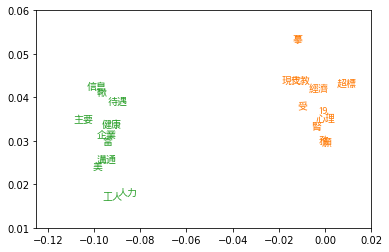

In [88]:
# plot the result
zhfont = matplotlib.font_manager.FontProperties(fname='/Users/youngmihuang/Downloads/wqy-microhei.ttc')
fig = plt.figure()
ax = fig.add_subplot(111)
 
for i in index1:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C2')

for i in index2:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C1')


ax.axis([-0.125,0.02, 0.01,0.06])
plt.figure(figsize=(60,60))
plt.show()